In [2]:
%matplotlib inline
import csv
import numpy as np
import pandas
import pylab

ducolors=['#321F20', '#7E317B', '#D8ACE0', '#006388', '#AA2B4A', '#CFDAD1', '#C4E5FA', '#E8E391', '#C43B8E', '#91B8BD', '#968E85']

In [3]:
with open("../data/jla_data_toconvert.txt", 'r') as jlaraw:
    jlarawstr = jlaraw.read()

In [4]:
jlarawlines = jlarawstr.split("\n")

In [5]:
i = 0
headings = []
while (jlarawlines[i] != r"#end"):
    thisline = jlarawlines[i]
    i+=1
    if thisline[0] == r"@":
        continue
    else:
        headings.append(thisline[1:-1])
    

In [6]:
print(headings)

['z', 'c', 'ce', 'msb', 'msbe', 'dm', 'dme', 'x0', 'x0e', 'x1', 'x1e', 'cmsb_c', 'cx0_c', 'cdm_c', 'x0x1_c', 'msbdm_c', 'cx1_c', 'dmx0_c', 'msbx0_c', 'dmx1_c', 'msbx1_c', 'name', 'chi2/dof', 'dof', 'TRESTMIN', 'TRESTMAX', 'X_FOCAL_PLANE', 'Y_FOCAL_PLANE', 'RA', 'DEC', 'Z_HELIO', 'Z_CMB', 'MWEBV', 'SNTYPE', 'SURVEY', 'LCSRC_0', '3rdvar', 'e3rdvar', 'pecvel', 'dz_pecvel', 'dbmag_pecvel', 'dbmag_malm', 'sigma_coh', 'sigma_lens']


In [7]:
#SNTYPE, SURVEY and name have str type but all others have float type
types = []

for heading in headings:
    if heading in ['STNYPE', 'SURVEY', 'name']:
        types.append(np.str_)
    else:
        types.append(np.float_)
        
print(types)

[<type 'numpy.float64'>, <type 'numpy.float64'>, <type 'numpy.float64'>, <type 'numpy.float64'>, <type 'numpy.float64'>, <type 'numpy.float64'>, <type 'numpy.float64'>, <type 'numpy.float64'>, <type 'numpy.float64'>, <type 'numpy.float64'>, <type 'numpy.float64'>, <type 'numpy.float64'>, <type 'numpy.float64'>, <type 'numpy.float64'>, <type 'numpy.float64'>, <type 'numpy.float64'>, <type 'numpy.float64'>, <type 'numpy.float64'>, <type 'numpy.float64'>, <type 'numpy.float64'>, <type 'numpy.float64'>, <type 'numpy.string_'>, <type 'numpy.float64'>, <type 'numpy.float64'>, <type 'numpy.float64'>, <type 'numpy.float64'>, <type 'numpy.float64'>, <type 'numpy.float64'>, <type 'numpy.float64'>, <type 'numpy.float64'>, <type 'numpy.float64'>, <type 'numpy.float64'>, <type 'numpy.float64'>, <type 'numpy.float64'>, <type 'numpy.string_'>, <type 'numpy.float64'>, <type 'numpy.float64'>, <type 'numpy.float64'>, <type 'numpy.float64'>, <type 'numpy.float64'>, <type 'numpy.float64'>, <type 'numpy.fl

In [8]:
# now we actually need to parse data into an array. This is going to be very messy. Sorry, future me if this breaks.
fulllist = []

for line in jlarawlines:
    if line:
        if (line[0]=='#') or (line[0]=='@'):
            continue
        else:
            thisarry = np.empty_like(types)
            thislist = line.split("  ")
            for i in range(len(thisarry)):
                thisarry[i] = thislist[i]
        
            fulllist.append(thisarry)
            

fullarray = np.array(fulllist)
print fullarray.shape
print float(fullarray[1,28])

(740, 44)
36.061634


In [9]:
jla = pandas.DataFrame(data=fullarray, columns=headings)

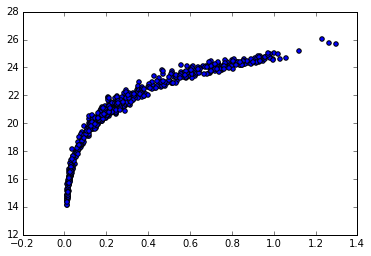

In [10]:
pylab.scatter(list(jla['z']), list(jla['msb']))

In [11]:
# jla.to_hdf('../data/jla.h5', 'table')

In [12]:
_NUMERALS = '0123456789abcdefABCDEF'
_HEXDEC = {v: int(v, 16) for v in (x+y for x in _NUMERALS for y in _NUMERALS)}

def rgb(triplet):
    return _HEXDEC[triplet[0:2]], _HEXDEC[triplet[2:4]], _HEXDEC[triplet[4:6]]

def alpha_from_mag(list_of_mags, color):
    '''actually set this to colour'''
    original = rgb(color[1:])
    colors = np.zeros((len(list_of_mags),4))
    colors[:, 0] = original[0]/256.
    colors[:, 1] = original[1]/256.
    colors[:, 2] = original[2]/256.
    
    minmag = float(min(jla['msb']))
    maxmag = float(max(jla['msb']))
    
    alphas = ((maxmag-np.array(list_of_mags))/(maxmag-minmag))

    colors[:, 3] = alphas

    return colors

def size_from_err(list_of_errs):
    return (500)/(1.+np.exp(5*np.array(list_of_errs)))

WHY DO YOU HAVE THE BE DIFFERENT, SDSS? WHY?!

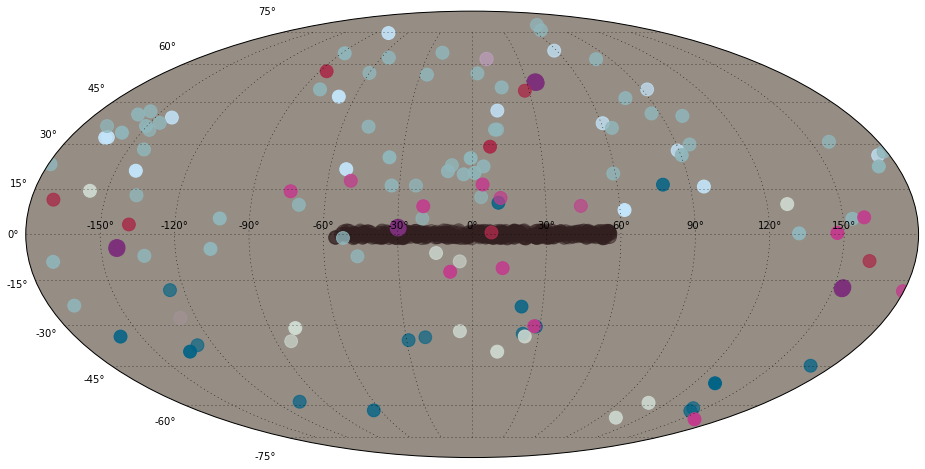

In [20]:
fig = pylab.figure(figsize=(16,12))
ax = fig.add_subplot(111, projection="mollweide")
ax.set_axis_bgcolor(ducolors[10])
ax.grid(True)

#sdss correct see http://arxiv.org/pdf/1507.07560v1.pdf
ax.scatter(np.array( jla.loc[jla['SURVEY'] == 'SDSS']['RA'], dtype=float)*(pylab.pi/180), np.array( jla.loc[jla['SURVEY'] == 'SDSS']['DEC'], dtype=float)*(pylab.pi/180), color=alpha_from_mag(np.array( jla.loc[jla['SURVEY'] == 'SDSS']['msb'], dtype=float), ducolors[0]), s=size_from_err(np.array( jla.loc[jla['SURVEY'] == 'SDSS']['msbe'], dtype=float)))
ax.scatter((np.array( jla.loc[jla['SURVEY'] == 'SNLS']['RA'], dtype=float)-180)*(pylab.pi/180), np.array( jla.loc[jla['SURVEY'] == 'SNLS']['DEC'], dtype=float)*(pylab.pi/180), color=alpha_from_mag(np.array( jla.loc[jla['SURVEY'] == 'SNLS']['msb'], dtype=float), ducolors[1]), s=size_from_err(np.array( jla.loc[jla['SURVEY'] == 'SNLS']['msbe'], dtype=float)))
ax.scatter((np.array( jla.loc[jla['SURVEY'] == 'RiessHST']['RA'], dtype=float)-180)*(pylab.pi/180), np.array( jla.loc[jla['SURVEY'] == 'RiessHST']['DEC'], dtype=float)*(pylab.pi/180), color=alpha_from_mag(np.array( jla.loc[jla['SURVEY'] == 'RiessHST']['msb'], dtype=float), ducolors[2]), s=size_from_err(np.array( jla.loc[jla['SURVEY'] == 'RiessHST']['msbe'], dtype=float)))
ax.scatter((np.array( jla.loc[jla['SURVEY'] == 'CalanTololo']['RA'], dtype=float)-180)*(pylab.pi/180), np.array( jla.loc[jla['SURVEY'] == 'CalanTololo']['DEC'], dtype=float)*(pylab.pi/180), color=alpha_from_mag(np.array( jla.loc[jla['SURVEY'] == 'CalanTololo']['msb'], dtype=float), ducolors[3]), s=size_from_err(np.array( jla.loc[jla['SURVEY'] == 'CalanTololo']['msbe'], dtype=float)))
ax.scatter((np.array( jla.loc[jla['SURVEY'] == 'CfAI']['RA'], dtype=float)-180)*(pylab.pi/180), np.array( jla.loc[jla['SURVEY'] == 'CfAI']['DEC'], dtype=float)*(pylab.pi/180), color=alpha_from_mag(np.array( jla.loc[jla['SURVEY'] == 'CfAI']['msb'], dtype=float), ducolors[4]), s=size_from_err(np.array( jla.loc[jla['SURVEY'] == 'CfAI']['msbe'], dtype=float)))
ax.scatter((np.array( jla.loc[jla['SURVEY'] == 'lowz']['RA'], dtype=float)-180)*(pylab.pi/180), np.array( jla.loc[jla['SURVEY'] == 'lowz']['DEC'], dtype=float)*(pylab.pi/180), color=alpha_from_mag(np.array( jla.loc[jla['SURVEY'] == 'lowz']['msb'], dtype=float), ducolors[5]), s=size_from_err(np.array( jla.loc[jla['SURVEY'] == 'lowz']['msbe'], dtype=float)))
ax.scatter((np.array( jla.loc[jla['SURVEY'] == 'CfAII']['RA'], dtype=float)-180)*(pylab.pi/180), np.array( jla.loc[jla['SURVEY'] == 'CfAII']['DEC'], dtype=float)*(pylab.pi/180), color=alpha_from_mag(np.array( jla.loc[jla['SURVEY'] == 'CfAII']['msb'], dtype=float), ducolors[6]), s=size_from_err(np.array( jla.loc[jla['SURVEY'] == 'CfAII']['msbe'], dtype=float)))
ax.scatter((np.array( jla.loc[jla['SURVEY'] == 'CfAIII']['RA'], dtype=float)-180)*(pylab.pi/180), np.array( jla.loc[jla['SURVEY'] == 'CfAIII']['DEC'], dtype=float)*(pylab.pi/180), color=alpha_from_mag(np.array( jla.loc[jla['SURVEY'] == 'CfAIII']['msb'], dtype=float), ducolors[9]), s=size_from_err(np.array( jla.loc[jla['SURVEY'] == 'CfAIII']['msbe'], dtype=float)))
ax.scatter((np.array( jla.loc[jla['SURVEY'] == 'CSP']['RA'], dtype=float)-180)*(pylab.pi/180), np.array( jla.loc[jla['SURVEY'] == 'CSP']['DEC'], dtype=float)*(pylab.pi/180), color=alpha_from_mag(np.array( jla.loc[jla['SURVEY'] == 'CSP']['msb'], dtype=float), ducolors[8]), s=size_from_err(np.array( jla.loc[jla['SURVEY'] == 'CSP']['msbe'], dtype=float)))

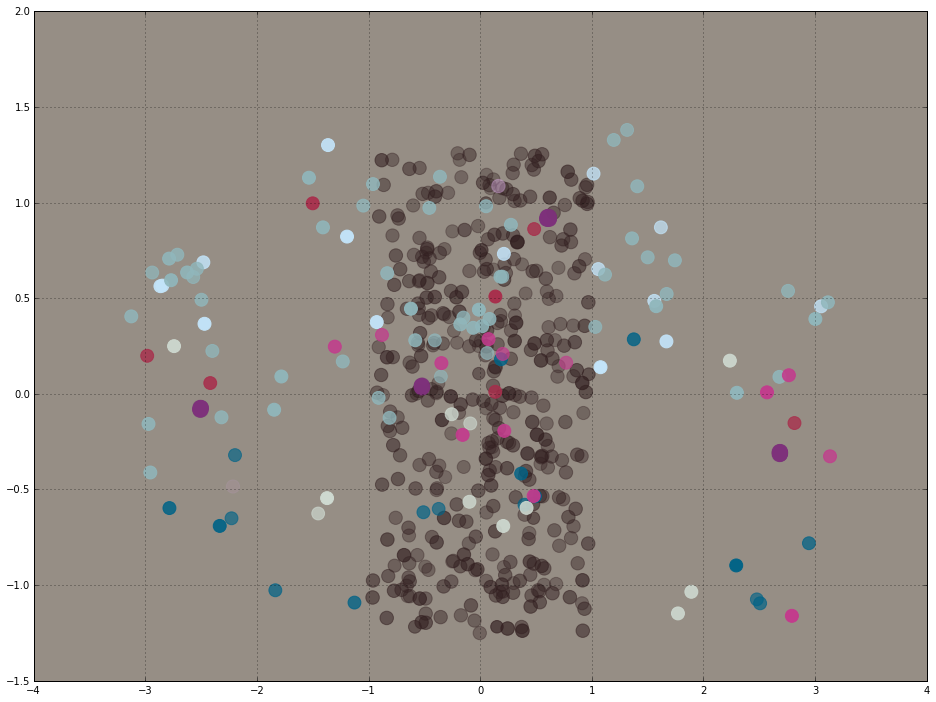

In [14]:
fig = pylab.figure(figsize=(16,12))
ax = fig.add_subplot(111)
ax.set_axis_bgcolor(ducolors[10])
ax.grid(True)

ax.scatter(np.array( jla.loc[jla['SURVEY'] == 'SDSS']['RA'], dtype=float)*(pylab.pi/180), np.array( jla.loc[jla['SURVEY'] == 'SDSS']['DEC'], dtype=float), color=alpha_from_mag(np.array( jla.loc[jla['SURVEY'] == 'SDSS']['msb'], dtype=float), ducolors[0]), s=size_from_err(np.array( jla.loc[jla['SURVEY'] == 'SDSS']['msbe'], dtype=float)))
ax.scatter((np.array( jla.loc[jla['SURVEY'] == 'SNLS']['RA'], dtype=float)-180)*(pylab.pi/180), np.array( jla.loc[jla['SURVEY'] == 'SNLS']['DEC'], dtype=float)*(pylab.pi/180), color=alpha_from_mag(np.array( jla.loc[jla['SURVEY'] == 'SNLS']['msb'], dtype=float), ducolors[1]), s=size_from_err(np.array( jla.loc[jla['SURVEY'] == 'SNLS']['msbe'], dtype=float)))
ax.scatter((np.array( jla.loc[jla['SURVEY'] == 'RiessHST']['RA'], dtype=float)-180)*(pylab.pi/180), np.array( jla.loc[jla['SURVEY'] == 'RiessHST']['DEC'], dtype=float)*(pylab.pi/180), color=alpha_from_mag(np.array( jla.loc[jla['SURVEY'] == 'RiessHST']['msb'], dtype=float), ducolors[2]), s=size_from_err(np.array( jla.loc[jla['SURVEY'] == 'RiessHST']['msbe'], dtype=float)))
ax.scatter((np.array( jla.loc[jla['SURVEY'] == 'CalanTololo']['RA'], dtype=float)-180)*(pylab.pi/180), np.array( jla.loc[jla['SURVEY'] == 'CalanTololo']['DEC'], dtype=float)*(pylab.pi/180), color=alpha_from_mag(np.array( jla.loc[jla['SURVEY'] == 'CalanTololo']['msb'], dtype=float), ducolors[3]), s=size_from_err(np.array( jla.loc[jla['SURVEY'] == 'CalanTololo']['msbe'], dtype=float)))
ax.scatter((np.array( jla.loc[jla['SURVEY'] == 'CfAI']['RA'], dtype=float)-180)*(pylab.pi/180), np.array( jla.loc[jla['SURVEY'] == 'CfAI']['DEC'], dtype=float)*(pylab.pi/180), color=alpha_from_mag(np.array( jla.loc[jla['SURVEY'] == 'CfAI']['msb'], dtype=float), ducolors[4]), s=size_from_err(np.array( jla.loc[jla['SURVEY'] == 'CfAI']['msbe'], dtype=float)))
ax.scatter((np.array( jla.loc[jla['SURVEY'] == 'lowz']['RA'], dtype=float)-180)*(pylab.pi/180), np.array( jla.loc[jla['SURVEY'] == 'lowz']['DEC'], dtype=float)*(pylab.pi/180), color=alpha_from_mag(np.array( jla.loc[jla['SURVEY'] == 'lowz']['msb'], dtype=float), ducolors[5]), s=size_from_err(np.array( jla.loc[jla['SURVEY'] == 'lowz']['msbe'], dtype=float)))
ax.scatter((np.array( jla.loc[jla['SURVEY'] == 'CfAII']['RA'], dtype=float)-180)*(pylab.pi/180), np.array( jla.loc[jla['SURVEY'] == 'CfAII']['DEC'], dtype=float)*(pylab.pi/180), color=alpha_from_mag(np.array( jla.loc[jla['SURVEY'] == 'CfAII']['msb'], dtype=float), ducolors[6]), s=size_from_err(np.array( jla.loc[jla['SURVEY'] == 'CfAII']['msbe'], dtype=float)))
ax.scatter((np.array( jla.loc[jla['SURVEY'] == 'CfAIII']['RA'], dtype=float)-180)*(pylab.pi/180), np.array( jla.loc[jla['SURVEY'] == 'CfAIII']['DEC'], dtype=float)*(pylab.pi/180), color=alpha_from_mag(np.array( jla.loc[jla['SURVEY'] == 'CfAIII']['msb'], dtype=float), ducolors[9]), s=size_from_err(np.array( jla.loc[jla['SURVEY'] == 'CfAIII']['msbe'], dtype=float)))
ax.scatter((np.array( jla.loc[jla['SURVEY'] == 'CSP']['RA'], dtype=float)-180)*(pylab.pi/180), np.array( jla.loc[jla['SURVEY'] == 'CSP']['DEC'], dtype=float)*(pylab.pi/180), color=alpha_from_mag(np.array( jla.loc[jla['SURVEY'] == 'CSP']['msb'], dtype=float), ducolors[8]), s=size_from_err(np.array( jla.loc[jla['SURVEY'] == 'CSP']['msbe'], dtype=float)))

In [18]:
print(min(jla.loc[jla['SURVEY'] == 'SDSS']['DEC']))
print(max(jla.loc[jla['SURVEY'] == 'SDSS']['DEC']))

-0.005896
1.256988
